In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
from sklearn.datasets  import load_boston
boston =load_boston()

In [59]:
data = pd.DataFrame(boston.data)

In [60]:
data.columns = boston.feature_names

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
data['PRICE'] = boston.target

In [62]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [63]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [64]:
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

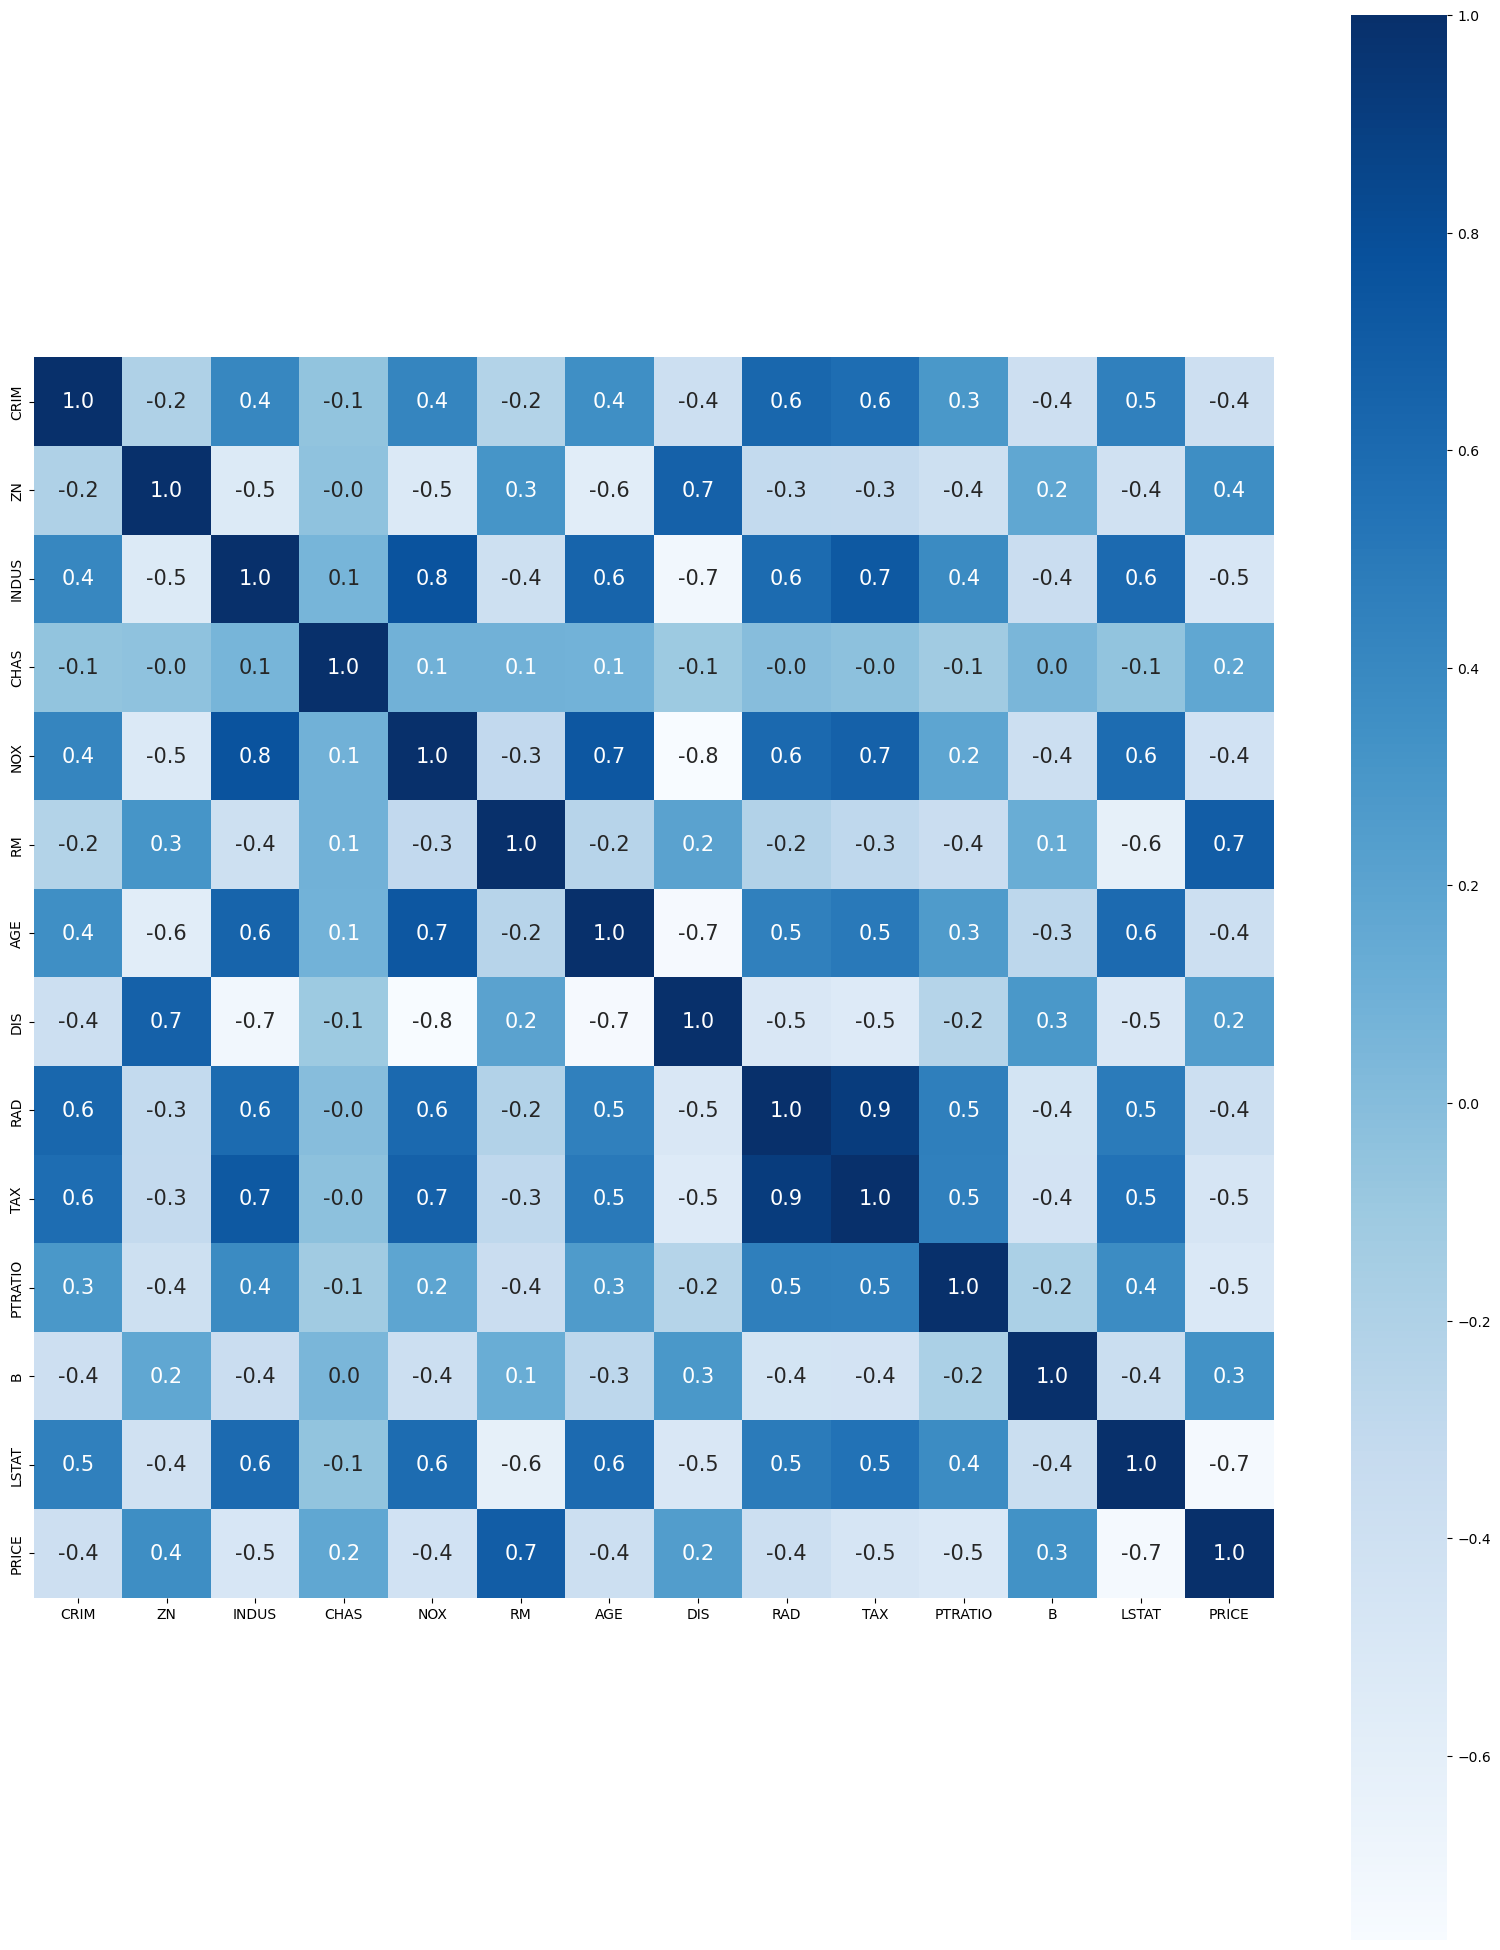

In [65]:
plt.figure(figsize=(20,25))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [66]:
x = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [67]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0)

In [68]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model=lm.fit(xtrain, ytrain)

In [69]:
ytrain

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: PRICE, Length: 404, dtype: float64

In [70]:
xtrain

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [71]:
ytrain_pred = lm.predict(xtrain)
xtest_pred = lm.predict(xtest)

In [72]:
testdata=[[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]]

In [73]:
test_pred = lm.predict(testdata)
test_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.49949836])

In [74]:
df1=pd.DataFrame(ytrain_pred,ytrain)
df2=pd.DataFrame(xtest_pred,ytest)
df1

,0
PRICE,
26.7,32.556927
21.7,21.927095
22.0,27.543826
22.9,23.603188
10.4,6.571910
...,...
18.5,19.494951
36.4,33.326364
19.2,23.796208


In [75]:
df2

,0
PRICE,
22.6,24.889638
50.0,23.721411
23.0,29.364999
8.3,12.122386
21.2,21.443823
...,...
24.7,25.442171
14.1,15.571783
18.7,17.937195


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print('MSE on test data:',mse)
mse1 = mean_squared_error(ytrain_pred, ytrain)
print('MSE on training data:',mse1)

MSE on test data: 33.44897999767653
MSE on training data: 19.326470203585725


In [77]:
r2 = lm.score(xtest, ytest)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
print('r-squared: {}'.format(r2))
print('------------------------------------------')
print('root mean squared error: {}'.format(rmse))

r-squared: 0.5892223849182507
------------------------------------------
root mean squared error: 5.783509315085135


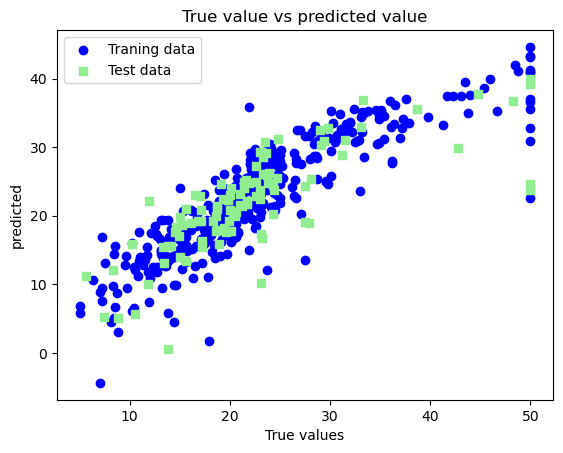

In [78]:
plt.scatter(ytrain, ytrain_pred,c='blue',marker='o',label='Traning data')
plt.scatter(ytest, ytest_pred,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('predicted')
plt.title("True value vs predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()

In [79]:
testdata=[[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]]

In [80]:
test_pred = lm.predict(testdata)
test_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.49949836])